In [1]:
#i do not get the right centre values if I have random values for centre, but if I guess it works out
import pandas as pd
import matplotlib.pyplot as plt
dataset = pd.read_csv("C:/Users/mailv/OneDrive/Documents/Machine_learning/Mall_Customers.csv")
X = dataset.iloc[:,[3,4]].values

In [2]:
dataset.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [3]:
dataset.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


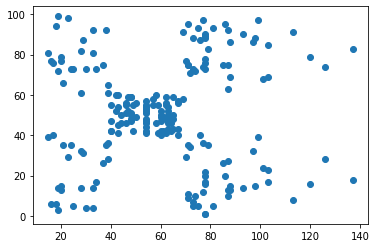

In [4]:
tempx = dataset.iloc[:,[3]].values
tempy = dataset.iloc[:,[4]].values
plt.scatter(tempx, tempy)

In [5]:
def distance_to_centres (a,loc_centres): #a needs to have  x and y coordinates, centres dict is second input
    list_five_distances=[]
    hoi=list(loc_centres.values())
    for i in range(5): #bc there are 5 centres
        list_five_distances.append((((a[0]-hoi[i][0])**2 + (a[1]-hoi[i][1])**2)**0.5))
    return list_five_distances


In [6]:
def dictionary_distances(x,loc_centres): #all datapoints is input
    points_and_distances={}
    for i in range(1,201): #all customers
        points_and_distances[i]=distance_to_centres((x[i]),loc_centres)
    return points_and_distances #dictionary with all the datapoints and corresponding five distances to centre point



In [7]:
#i do not know how to do this smoothly, like getting 5 lists if you have 5 centres and 3 if you have three
def allocating_to_centre(result): #The output from dictionary distance must be the input here
    centre1=[]
    centre2=[]
    centre3=[]
    centre4=[]
    centre5=[]
    
    for i in range (1,200):
        values=result[i]
        if (min(values))==values[0]:
            centre1.append(i)
        if min(values)==values[1]:
            centre2.append(i)
        if (min(values))==values[2]:
            centre3.append(i)
        if min(values)==values[3]:
            centre4.append(i)       
        if min(values)==values[4]:
            centre5.append(i)    
    list_of_centres=[]
    list_of_centres.append(centre1)
    list_of_centres.append(centre2)
    list_of_centres.append(centre3)
    list_of_centres.append(centre4)
    list_of_centres.append(centre5)
    return list_of_centres


In [8]:
def updating_centres(centres): #the output from allocating to centre must be the input here, so step2
    loc_centres={}
    for i in range(len(centres)):
        x=[]
        y=[]
#     if len(centres[i])==0: #here i will get an error if no point is allocated to a centre
#          loc_centres[i]=centres[i]   #just return the thing that it originally was
#     else:
        for j in range(1,201):#len(centres[i])+1): 
            if j in centres[i]:
                x.append(x_y_datapoints[j][0])
                y.append(x_y_datapoints[j][1])
        a=sum(x)/len(x)
        b=sum(y)/len(y)
        loc_centres[i]=a,b

    return loc_centres
    


        

In [9]:
import random 
import numpy as np

random.seed(87)
datapoints = dataset.iloc[:,[0]].values
datapoints = datapoints.ravel()
datapoints=datapoints.tolist()
centre_ids=(random.sample(datapoints, k=5)) 
#k is amount of clusters and it does not matter if you tqke the location randomly or take a point's location



In [10]:
income = dataset['Annual Income (k$)']
spending = dataset['Spending Score (1-100)']
loc_centres={}
for i in range(5):
    w=centre_ids[i]
    loc_centres[i]=income[w],spending[w]    
print("The inital guess is:",loc_centres)
loc_centres={0: (25, 25), 1: (30, 85), 2: (40, 42), 3: (90, 90), 4: (120, 20)}
x_y_datapoints={}
for i in range(len(datapoints)):
    x_y_datapoints[datapoints[i]]=income[i],spending[i]


The inital guess is: {0: (37, 26), 1: (103, 85), 2: (40, 42), 3: (74, 72), 4: (28, 61)}


In [11]:
for i in range (20): #until convergence
    step1=dictionary_distances(x_y_datapoints, loc_centres)
    step2=allocating_to_centre(step1)
    loc_centres=updating_centres(step2)


<function matplotlib.pyplot.show(*args, **kw)>

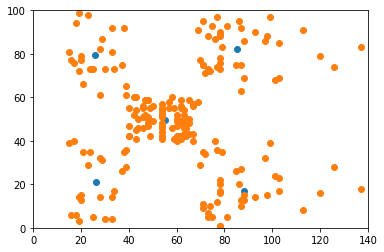

In [12]:
hoi=list(loc_centres.values())
t, w = zip(*hoi)

plt.scatter(t, w, cmap='viridis')
plt.xlim(0,140)
plt.ylim(0,100)
plt.scatter(tempx, tempy,cmap='magma')

plt.show


In [13]:
loc_centres

{0: (26.304347826086957, 20.91304347826087),
 1: (25.727272727272727, 79.36363636363636),
 2: (55.2962962962963, 49.51851851851852),
 3: (85.21052631578948, 82.10526315789474),
 4: (88.2, 17.114285714285714)}